In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create pandas df from pickle 
df = pd.read_pickle('./pickles/attributes.pkl')
df

,max_degree,min_degree,avg_degree,n_nodes,n_edges,density,assortativity,avg_clustering,transitivity,approx diameter,s_metric,name
0,50.0,1.0,13.487805,410.0,2765.0,0.032978,0.225752,0.455824,0.435693,9.0,1.019082e+06,infectious
1,12.0,1.0,5.129032,62.0,159.0,0.084082,-0.043594,0.258958,0.308776,8.0,7.313000e+03,dolphin
2,50.0,1.0,13.487805,410.0,2765.0,0.032978,0.225752,0.455824,0.435693,9.0,1.019082e+06,sfhh
3,134.0,20.0,68.735537,242.0,8317.0,0.285210,0.118271,0.525542,0.479790,3.0,5.257151e+07,french_school
4,1383.0,1.0,10.731897,33696.0,180811.0,0.000319,-0.116499,0.509190,0.085130,13.0,2.366676e+09,Enron
5,351.0,1.0,27.355155,1222.0,16714.0,0.022404,-0.221329,0.320255,0.225959,8.0,9.221125e+07,PB
6,1045.0,1.0,43.691013,4039.0,88234.0,0.010820,0.063577,0.605547,0.519174,8.0,1.078880e+09,Facebook
7,1065.0,1.0,28.512879,7066.0,100736.0,0.004036,-0.083303,0.141875,0.125479,7.0,1.934461e+09,WV
8,305.0,1.0,4.875395,15810.0,38540.0,0.000308,-0.114504,0.000000,0.000000,17.0,2.132698e+07,Sex
9,139.0,1.0,12.807229,332.0,2126.0,0.038693,-0.207876,0.625217,0.396392,6.0,3.632022e+06,USAir


In [4]:
df_corr = df.drop(['name', 'min_degree'], axis=1).corr('pearson')
df_corr.style.background_gradient(cmap='bwr', vmin=-1, vmax=1)


,max_degree,avg_degree,n_nodes,n_edges,density,assortativity,avg_clustering,transitivity,approx diameter,s_metric
max_degree,1.000000,0.278355,0.685656,0.961596,-0.226486,-0.256093,0.082380,-0.199014,-0.153633,0.954185
avg_degree,0.278355,1.000000,-0.212327,0.121523,0.714555,0.020839,0.357456,0.396639,-0.513361,0.168749
n_nodes,0.685656,-0.212327,1.000000,0.839526,-0.311150,-0.205989,-0.172738,-0.501263,0.207388,0.710887
n_edges,0.961596,0.121523,0.839526,1.000000,-0.256133,-0.199387,0.026548,-0.283829,-0.041935,0.962699
density,-0.226486,0.714555,-0.311150,-0.256133,1.000000,0.082373,0.326271,0.429676,-0.397328,-0.210529
assortativity,-0.256093,0.020839,-0.205989,-0.199387,0.082373,1.000000,0.244175,0.576275,0.054381,-0.205171
avg_clustering,0.082380,0.357456,-0.172738,0.026548,0.326271,0.244175,1.000000,0.842191,-0.314698,0.060816
transitivity,-0.199014,0.396639,-0.501263,-0.283829,0.429676,0.576275,0.842191,1.000000,-0.291370,-0.224029
approx diameter,-0.153633,-0.513361,0.207388,-0.041935,-0.397328,0.054381,-0.314698,-0.291370,1.000000,-0.094155
s_metric,0.954185,0.168749,0.710887,0.962699,-0.210529,-0.205171,0.060816,-0.224029,-0.094155,1.000000


In [5]:
df_corr = df.drop(['name', 'min_degree'], axis=1).corr('spearman')
df_corr.style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,max_degree,avg_degree,n_nodes,n_edges,density,assortativity,avg_clustering,transitivity,approx diameter,s_metric
max_degree,1.000000,0.530992,0.471074,0.764463,-0.194215,-0.444215,0.020661,-0.194215,-0.335428,0.917355
avg_degree,0.530992,1.000000,-0.266529,0.278926,0.574380,0.229339,0.373967,0.477273,-0.781277,0.644628
n_nodes,0.471074,-0.266529,1.000000,0.816116,-0.927686,-0.247934,-0.570248,-0.675620,0.520851,0.471074
n_edges,0.764463,0.278926,0.816116,1.000000,-0.580579,-0.134298,-0.349174,-0.392562,0.094795,0.857438
density,-0.194215,0.574380,-0.927686,-0.580579,1.000000,0.229339,0.551653,0.679752,-0.741692,-0.159091
assortativity,-0.444215,0.229339,-0.247934,-0.134298,0.229339,1.000000,0.175620,0.574380,-0.017709,-0.157025
avg_clustering,0.020661,0.373967,-0.570248,-0.349174,0.551653,0.175620,1.000000,0.805785,-0.279176,0.020661
transitivity,-0.194215,0.477273,-0.675620,-0.392562,0.679752,0.574380,0.805785,1.000000,-0.325011,-0.082645
approx diameter,-0.335428,-0.781277,0.520851,0.094795,-0.741692,-0.017709,-0.279176,-0.325011,1.000000,-0.334387
s_metric,0.917355,0.644628,0.471074,0.857438,-0.159091,-0.157025,0.020661,-0.082645,-0.334387,1.000000


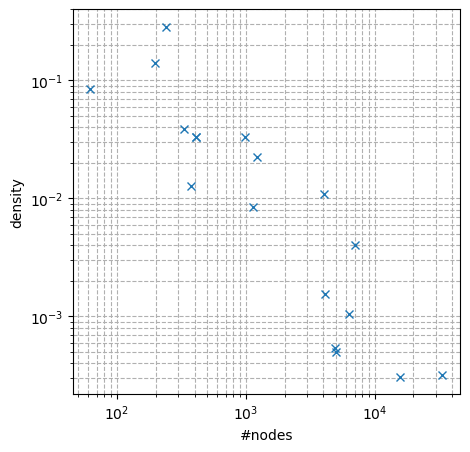

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
df.plot(y='density', x='n_nodes', linestyle='', marker='x', ax=ax, xlabel='#nodes', ylabel='density')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend().remove()
plt.grid(True, which='both', ls='--')

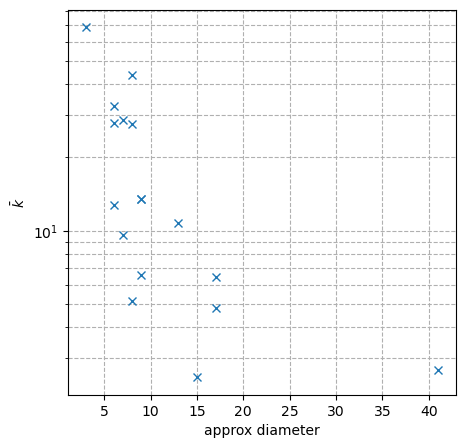

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
df.drop(8).plot(y='avg_degree', x='approx diameter', linestyle='', marker='x', ax=ax, xlabel='approx diameter', ylabel=r'$\bar{k}$')
ax.set_yscale('log')
ax.legend().remove()
plt.grid(True, which='both', ls='--')

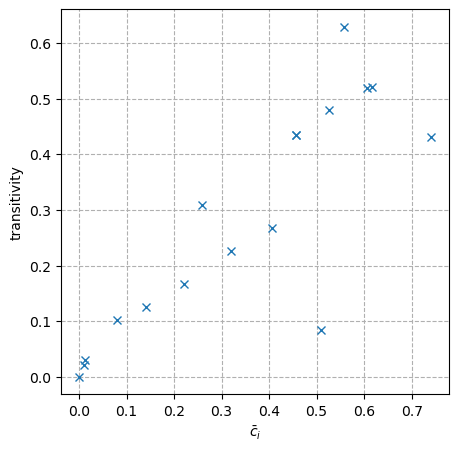

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
df.drop(9).plot(y='transitivity', x='avg_clustering', linestyle='', marker='x', ax=ax, xlabel=r'$\bar c_i$', ylabel=r'transitivity')
#ax.set_yscale('log')
ax.legend().remove()
plt.grid(True, which='both', ls='--')

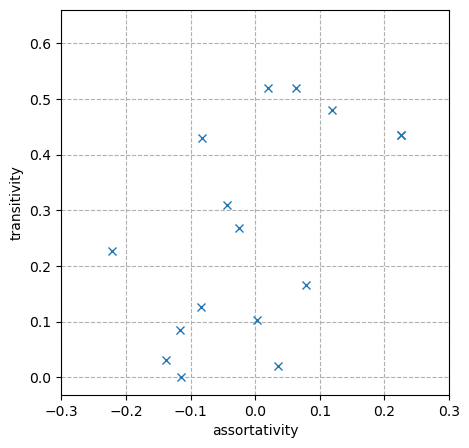

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
df.drop(9).plot(y='transitivity', x='assortativity', linestyle='', marker='x', ax=ax, xlabel=r'assortativity', ylabel=r'transitivity')
#ax.set_xscale('log')
ax.legend().remove()
ax.set_xlim(-.3, .3)
plt.grid(True, which='both', ls='--')

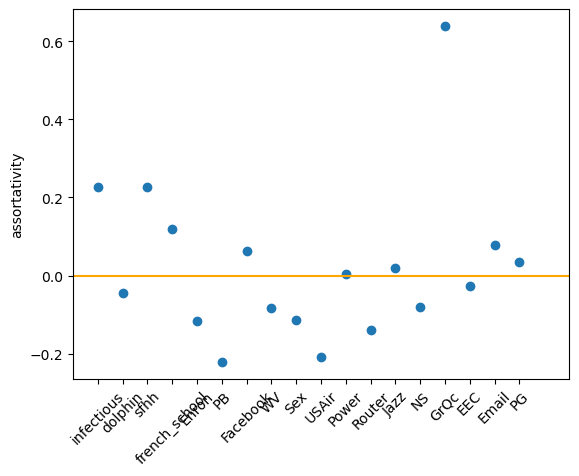

In [11]:
fig, ax = plt.subplots()
df.plot(y='assortativity', marker='o', linestyle='', ax=ax, ylabel='assortativity')
ax.set_xticks(np.arange(len(df.name)))
ax.set_xticklabels(df.name, rotation=45)
ax.hlines(0, -2, len(df.name) + 2, colors='orange')
ax.set_xlim(-1, len(df.name) + 1)
ax.legend().remove()

In [30]:
df_correlations = pd.read_pickle('./pickles/correlations_clust_nndegree_corenumber.pkl').drop(9).convert_dtypes()
for column in df_correlations.columns[:-1]:
    df_correlations[column] = pd.to_numeric(df_correlations[column])

<Axes: xlabel='$r_{core number, c}$', ylabel='$r_{k_{nn}, c}$'>

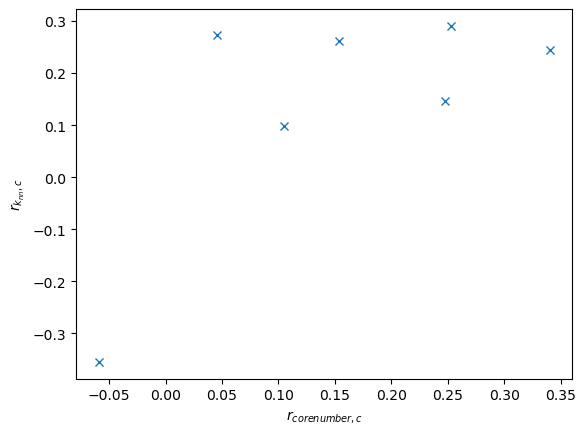

In [31]:
df_corr_sig =df_correlations[df_correlations['$p_{core number, c}$'] <= .005]
df_corr_sig =df_correlations[df_correlations['$p_{k_{nn}, c}$'] <= .005]

df_corr_sig.plot(x='$r_{core number, c}$', y='$r_{k_{nn}, c}$', marker='x', ls='', xlabel='$r_{core number, c}$', ylabel='$r_{k_{nn}, c}$', legend=None)